In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from aslib_scenario import ASlibScenario

In [38]:
np.set_printoptions(precision=3, suppress=True)
good_scenarios = ['CSP-Minizinc-Time-2016', 'MIP-2016','QBF-2016', 'CPMP-2015']
bad_scenarios = ['ASP-POTASSCO', 'MAXSAT12-PMS', 'QBF-2011', 'SAT12-HAND', 'SAT12-ALL']

In [39]:
scenario_names = ["ASP-POTASSCO", "CSP-Minizinc-Time-2016", "MAXSAT12-PMS", "MIP-2016", "QBF-2011", "QBF-2016", "SAT12-HAND", "CPMP-2015", "SAT12-ALL"]
def read_performance_df(scenario_name):
	scenario = ASlibScenario()
	scenario.read_scenario("data/aslib_data-master/" + scenario_name)
	performance_df = scenario.performance_data
	performance_df = performance_df / (scenario.algorithm_cutoff_time * 10)
	performance_df = performance_df.transpose()
	return performance_df
def variance_of_performance_df(performance_df):
	return performance_df.var(axis=0)
def standard_deviation_of_performance_df(performance_df):
	return performance_df.std(axis=0)

In [40]:
average_variances = dict()
standard_deviations = dict()
good_variances = dict()
bad_variances = dict()
good_standard_deviations = dict()
bad_standard_deviations = dict()
for scenario_name in scenario_names:
    performance_data = read_performance_df(scenario_name)
    variances = variance_of_performance_df(performance_data)
    average_variance = variances.values
    average_variances[scenario_name] = (average_variance)
    if scenario_name in good_scenarios:
        good_variances[scenario_name]= (average_variance)
    else:
        bad_variances[scenario_name]= (average_variance)
    standard_deviation = standard_deviation_of_performance_df(performance_data).values
    if scenario_name in good_scenarios:
        good_standard_deviations[scenario_name]=(standard_deviation)
    else:
        bad_standard_deviations[scenario_name] = (standard_deviation)
    standard_deviations[scenario_name]= (standard_deviation)
    

Optional file not found: data/aslib_data-master/ASP-POTASSCO/ground_truth.arff
Have not found algorithm_cutoff_memory
Have not found features_cutoff_memory
Have not found features_stochastic
Found 37 duplicated feature vectors
Index(['FolioSuite/ASP-Comp-2007-Lparse/SLparse/CarSequencing/001.benchmark1_17classes.dlv.dat.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.15.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.30.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/hampath.ngrnd.6.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Hashiwokakero/hashiwokakero-size11-puzzle5.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/SolitaireBackward2/t29.dat.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Su-Doku/sudoku378.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/WeightBoundedDominatingSetSuite/rand_150_600_1159731678_7.gph.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/searchTest

In [41]:
standard_deviations

{'ASP-POTASSCO': array([0.001, 0.001, 0.001, ..., 0.   , 0.   , 0.008]),
 'CSP-Minizinc-Time-2016': array([0.463, 0.361, 0.363, 0.222, 0.489, 0.222, 0.307, 0.503, 0.504,
        0.503, 0.443, 0.51 , 0.365, 0.467, 0.363, 0.363, 0.362, 0.362,
        0.402, 0.492, 0.507, 0.   , 0.   , 0.   , 0.   , 0.306, 0.428,
        0.409, 0.46 , 0.496, 0.366, 0.51 , 0.223, 0.224, 0.306, 0.5  ,
        0.489, 0.5  , 0.498, 0.501, 0.438, 0.304, 0.363, 0.364, 0.303,
        0.223, 0.494, 0.466, 0.223, 0.366, 0.48 , 0.501, 0.   , 0.   ,
        0.496, 0.41 , 0.444, 0.511, 0.497, 0.497, 0.204, 0.364, 0.   ,
        0.   , 0.404, 0.502, 0.511, 0.502, 0.498, 0.   , 0.   , 0.306,
        0.   , 0.   , 0.506, 0.223, 0.443, 0.307, 0.358, 0.304, 0.221,
        0.409, 0.509, 0.453, 0.485, 0.485, 0.349, 0.   , 0.306, 0.   ,
        0.   , 0.   , 0.   , 0.362, 0.306, 0.306, 0.223, 0.222, 0.465,
        0.435]),
 'MAXSAT12-PMS': array([0.407, 0.407, 0.407, 0.407, 0.407, 0.547, 0.548, 0.547, 0.548,
        0.547, 0

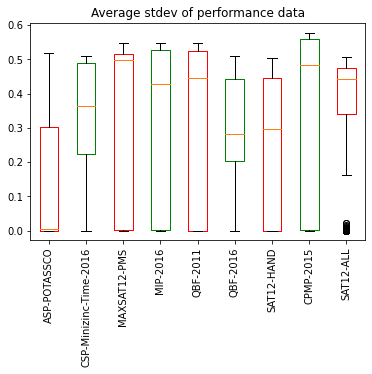

In [43]:
fig, axs = plt.subplots()
axs.set_title('Average stdev of performance data')
plots = axs.boxplot(standard_deviations.values())
axs.set_xticklabels(standard_deviations.keys(), rotation=90)

for plot, scenario_name in zip(plots['boxes'], standard_deviations.keys()):
	if scenario_name in good_scenarios:
		plot.set_color('g')
	else:
		plot.set_color('r')
